I wrote two methods for the NEMO reader

1. NEMO_native_linearindex - Based on the ROMS_native reader - assumes a linear relationship between grid index and lat/lon positions - this doesn't hold for some of the NEMO models.
2. NEMO_native_interpolate - Identifies indices in a neighbourhood around desired positions and then interpolates everything to a regular lat/lon grid. This is essentially how the flattened NEMO files are handled now.

This notebook compares the two methods.

In [1]:
import glob
import os
import datetime

import numpy as np
import xarray as xr

from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_NEMO_native_interpolate, reader_NEMO_native_linearindex

In [2]:
CIOPSW3D='/home/soontiensn/data/opendrift_test_data/CIOPSW/3D/'
CIOPSW2D='/home/soontiensn/data/opendrift_test_data/CIOPSW/2D/'
CIOPSW_mesh='/home/soontiensn/data/opendrift_test_data/CIOPSW/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc'
CIOPSW3D_mapping={'vo': 'y_sea_water_velocity', 'uo': 'x_sea_water_velocity', 'time_counter': 'time'}
CIOPSW2D_mapping={'vos': 'y_sea_water_velocity', 'uos': 'x_sea_water_velocity', 'time_counter': 'time'}


# reader_NEMO_native_interpolate

## 3D

In [3]:
reader = reader_NEMO_native_interpolate.Reader(os.path.join(CIOPSW3D, '*.nc'),
                                  meshfile=CIOPSW_mesh, variable_mapping=CIOPSW3D_mapping,
                                  rotation_pickle_file='CIOPSW_angles.pickle', model_land_mask=True)
reader

Reader: NEMO native
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -142.283173   xmax: -120.568398   step: 0.0264286   numx: 822
  ymin: 44.333385   ymax: 59.621494   step: 0.013255   numy: 1154
  Corners (lon, lat):
    (-142.28,  59.62)  (-120.57,  59.62)
    (-142.28,  44.33)  (-120.57,  44.33)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048

In [4]:
o3D_interp = OceanDrift()
o3D_interp.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o3D_interp.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o3D_interp.set_config('general:use_auto_landmask', False)
o3D_interp.set_config('seed:ocean_only', False)
o3D_interp.run()

15:21:27 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
15:21:27 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
15:21:27 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
15:21:28 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2019-gcb6fc77-dirty)
15:21:28 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
15:21:28 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
15:21:28 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 32 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1 day, 0:00:00
15:21:28 DEBUG   opendrift.models.basemodel: Added reader NEMO native
15:21:28 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift version 1.7.3
  Platform: Linux, 4.15.0-163-generic
  31.331886291503906 GB memory
 

15:21:30 DEBUG   opendrift: NaN values for 27 elements, expanding data 8
15:21:30 DEBUG   opendrift: NaN values for 23 elements, expanding data 9
15:21:30 DEBUG   opendrift: NaN values for 21 elements, expanding data 10
15:21:30 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
15:21:30 DEBUG   opendrift: NaN values for 45 elements, expanding data 1
15:21:30 DEBUG   opendrift: NaN values for 41 elements, expanding data 2
15:21:30 DEBUG   opendrift: NaN values for 39 elements, expanding data 3
15:21:30 DEBUG   opendrift: NaN values for 35 elements, expanding data 4
15:21:30 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
15:21:30 DEBUG   opendrift: NaN values for 30 elements, expanding data 6
15:21:30 DEBUG   opendrift: NaN values for 29 elements, expanding data 7
15:21:30 DEBUG   opendrift: NaN values for 27 elements, expanding data 8
15:21:30 DEBUG   opendrift: NaN values for 23 elements, expanding data 9
15:21:30 DEBUG   opendrift: NaN values for 21 el

15:21:31 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 143x258x2) for time after (2018-06-03 00:00:00)
15:21:31 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
15:21:31 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:31 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-03 00:00:00) in space  (linearNDFast)
15:21:31 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:31 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00, weight 0.96) and
		      after (2018-06-03 00:00:00, weight 0.04) in time
15:21:31 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:21:31 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:31 DEBUG   opendrift.models.basemodel: ------------------------

15:21:31 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:31 DEBUG   opendrift.models.basemodel: 		164 active elements
15:21:31 DEBUG   opendrift.models.basemodel: 		

15:21:31 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:31 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:31 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:31 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:31 DEBUG   opendrift.models.basemodel: 163 active elements (237 deactivated)
15:21:31 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:31 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:31 INFO    opendrift.models.basemodel: 2018-06-02 04:00:00 - step 5 of 48 - 163 active elements (237 deactivated)
15:21:31 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:31 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:31 DEBUG   opendrift.models.basemodel: ----------------

15:21:31 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:31 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:31 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:31 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:31 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.570362 (min) 0.231507 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.453519 (min) 0.239529 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     upward_se

15:21:31 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:31 DEBUG   opendrift.models.basemodel: 		163 active elements
15:21:31 DEBUG   opendrift.models.basemodel: 		46.95526701503945 <- latitude  -> 50.00628186196656
15:21:31 DEBUG   opendrift.models.basemodel: 		-125.99566275143204 <- longitude -> -122.61857150328612
15:21:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:31 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:31 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:31 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:31 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:31 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:31 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deacti

15:21:31 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:31 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:31 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:31 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:31 DEBUG   opendrift.models.basemodel: Data needed for 162 elements
15:21:31 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:31 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (before)
		2018-06-03 00:00:00 (after)
15:21:31 DEBUG   opendrift.readers.basereader.structured: I

15:21:31 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:31 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:31 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:31 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.446017 (min) 0.323218 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.384082 (min) 0.26379 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:31 DEBUG   opendrift.models.ba

15:21:31 DEBUG   opendrift.models.basemodel: 		46.92605535258548 <- latitude  -> 50.011619082667515
15:21:31 DEBUG   opendrift.models.basemodel: 		-125.9936209513775 <- longitude -> -122.60363325717402
15:21:31 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:31 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:31 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:32 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:32 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:21:32 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:32 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared oc

15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Data needed for 159 elements
15:21:32 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:32 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (before)
		2018-06-03 00:00:00 (after)
15:21:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
15:21:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:32 DEBUG   opendrift.r

15:21:32 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:32 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.458498 (min) 0.528182 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.893064 (min) 0.281487 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_s

15:21:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:32 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:32 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:32 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
15:21:32 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:21:32 DEBUG   opendrift.models.basemodel: Removed 1 elements.
15:21:32 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
15:21:32 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:21:32 DEBUG   opendrift.models.ba

15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Data needed for 156 elements
15:21:32 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:32 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (before)
		2018-06-03 00:00:00 (after)
15:21:32 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
15:21:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:32 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-03 00:00:00) in space  (linearNDFast)
15:21:32 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:32 DEBUG   opendrift.rea

15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.b

15:21:32 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:32 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:32 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:32 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:32 DEBUG   opendrift.models.basemodel: 156 active elements (244 deactivated)
15:21:32 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:32 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:32 INFO    opendrift.models.basemodel: 2018-06-02 19:00:00 - step 20 of 48 - 156 active elements (244 deactivated)
15:21:32 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:32 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:32 DEBUG   opendrift.models.basemodel: ---------------

15:21:32 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:32 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:32 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:32 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:32 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:32 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.485479 (min) 0.196602 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.345365 (min) 0.352766 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     upward_se

15:21:32 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: 		156 active elements
15:21:32 DEBUG   opendrift.models.basemodel: 		46.84339601815426 <- latitude  -> 50.02563725771623
15:21:32 DEBUG   opendrift.models.basemodel: 		-125.9988058558442 <- longitude -> -122.57175707623108
15:21:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:32 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:32 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:32 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:32 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactiv

15:21:32 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:32 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:32 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:32 DEBUG   opendrift.models.basemodel: Data needed for 154 elements
15:21:32 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:32 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (before)
		2018-06-03 00:00:00 (after)
15:21:32 DEBUG   opendrift.readers.basereader.structured: I

15:21:32 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:32 DEBUG   opendrift.models.base

15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.0416667 (max)
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: 		151 active elements
15:21:34 DEBUG   opendrift.models.basemodel: 		46.81243147357239 <- latitude  -> 50.031085439840204
15:21:34 DEBUG   opendrift.models.basemodel: 		-126.00861412201174 <- longitude -> -122.5

15:21:34 DEBUG   opendrift.models.basemodel: 151 active elements (249 deactivated)
15:21:34 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:34 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:34 INFO    opendrift.models.basemodel: 2018-06-03 03:00:00 - step 28 of 48 - 151 active elements (249 deactivated)
15:21:34 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:34 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:34 DEBUG   opendrift.models.basemodel

15:21:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:21:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:34 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:34 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:34 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.561252 (min) 0.393977 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.421678 (min) 0.405244 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:34 

15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.791667 (max)
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: 		151 active elements
15:21:34 DEBUG   opendrift.models.basemodel: 		46.781697249988106 <- latitude  -> 50.037233737198264
15:21:34 DEBUG   opendrift.models.basemodel: 		-126.02209663891959 <- longitude -> -122.5

15:21:34 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:21:34 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:21:34 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
15:21:34 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:34 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:34 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:34 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:34 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:34 DEBUG   opendrift.models.basemodel: 150 active elements (250 deactivated)
15:21:34 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:34 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:34 INFO    opendr

15:21:34 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Data needed for 149 elements
15:21:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:34 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:21:34 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (32) must be increased. See `Variables.set_buffer_size`.
15:21:34 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (

15:21:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:34 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:34 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:34 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.673698 (min) 0.233603 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.368883 (min) 0.405 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     upward_sea_w

15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.583333 (max)
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: 		149 active elements
15:21:34 DEBUG   opendrift.models.basemodel: 		46.741725796413 <- latitude  -> 50.0472868042055
15:21:34 DEBUG   opendrift.models.basemodel: 		-126.04198658163084 <- longitude -> -122.5801030745363
15:21:34 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:34 DEBUG   opendrift.models.physics_

15:21:34 DEBUG   opendrift.models.basemodel: 149 active elements (251 deactivated)
15:21:34 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:34 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:34 INFO    opendrift.models.basemodel: 2018-06-03 12:00:00 - step 37 of 48 - 149 active elements (251 deactivated)
15:21:34 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:34 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:34 DEBUG   opendrift.models.basemodel

15:21:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 1
15:21:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 1
15:21:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 1
15:21:34 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-04 00:00:00) in space  (linearNDFast)
15:21:34 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:34 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.46) and
		      after (2018-06-04 00:00:00, weight 0.54) in time
15:21:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:21:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:34 DEBUG   opendrift.

15:21:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.b

15:21:34 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:34 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:34 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:34 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:21:34 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:34 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:34 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:34 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:34 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:34 DEBUG   opendrift.models.basemodel: 149 active elements (251 deactivated)
15:21:34 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:34 DEBUG  

15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:34 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Data needed for 148 elements
15:21:34 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:34 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:21:34 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (32) must be increased. See `Variables.set_buffer_size`.
15:21:34 DEBUG   opendrift

15:21:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:21:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:34 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:34 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:34 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:34 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.38195 (min) 0.27825 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.525526 (min) 0.272709 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:34 DE

15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:34 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.791667 (max)
15:21:34 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:34 DEBUG   opendrift.models.basemodel: 		148 active elements
15:21:34 DEBUG   opendrift.models.basemodel: 		46.66609894648851 <- latitude  -> 50.05195806249188
15:21:34 DEBUG   opendrift.models.basemodel: 		-126.07576313771716 <- longitude -> -122.608

15:21:35 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:35 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:35 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:35 DEBUG   opendrift.models.basemodel: 148 active elements (252 deactivated)
15:21:35 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:35 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:35 INFO    opendrift.models.basemodel: 2018-06-03 21:00:00 - step 46 of 48 - 148 active elements (252 deactivated)
15:21:35 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:35 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:35 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:35 DEBUG   opendrift.models.basemodel: Variable group ['

15:21:35 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
15:21:35 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:35 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
15:21:35 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
15:21:35 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
15:21:35 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
15:21:35 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-04 00:00:00) in space  (linearNDFast)
15:21:35 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:35 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.08) and
		      after (2018-06-04 00:00:00, weight 0.92) in time
15:21:35 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is 

15:21:35 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:35 DEBUG   opendrift.models.basemodel:     surface_

# 2D Cgrid

In [5]:
reader = reader_NEMO_native_interpolate.Reader(os.path.join(CIOPSW2D, '*.nc'),
                                  meshfile=CIOPSW_mesh, variable_mapping=CIOPSW2D_mapping,
                                  rotation_pickle_file='CIOPSW_angles.pickle', model_land_mask=True)
reader

15:21:35 INFO    opendrift.readers.reader_NEMO_native_interpolate: Opening dataset: /home/soontiensn/data/opendrift_test_data/CIOPSW/2D/*.nc
15:21:35 INFO    opendrift.readers.reader_NEMO_native_interpolate: Opening files with MFDataset
15:21:35 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 9 for reader NEMO native, assuming a maximum average speed of 5 m/s and time span of 1:00:00
15:21:35 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Reader: NEMO native
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -142.283173   xmax: -120.568398   step: 0.0264286   numx: 822
  ymin: 44.333385   ymax: 59.621494   step: 0.013255   numy: 1154
  Corners (lon, lat):
    (-142.28,  59.62)  (-120.57,  59.62)
    (-142.28,  44.33)  (-120.57,  44.33)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048

In [6]:
o2D_interp = OceanDrift()
o2D_interp.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o2D_interp.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o2D_interp.set_config('general:use_auto_landmask', False)
o2D_interp.set_config('seed:ocean_only', False)
o2D_interp.run()

15:21:35 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
15:21:35 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
15:21:35 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
15:21:35 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
15:21:35 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2019-gcb6fc77-dirty)
15:21:35 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
15:21:35 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
15:21:35 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 4 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1:00:00
15:21:35 DEBUG   opendrift.models.basemodel: Added reader NEMO native
15:21:35 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift vers

15:21:36 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for y_sea_water_velocity for 17 elements
15:21:36 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:36 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:36 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.43194 (min) 1.34675 (max)
15:21:36 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.602996 (min) 0.8782 (max)
15:21:36 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:36 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:36 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:36 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:36 DE

15:21:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:37 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:37 DEBUG   opendrift.models.basemode

15:21:38 DEBUG   opendrift.models.basemodel: 		46.981501481928866 <- latitude  -> 50.003143287617775
15:21:38 DEBUG   opendrift.models.basemodel: 		-126.00226822429558 <- longitude -> -122.60421864772124
15:21:38 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:38 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:38 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:38 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:38 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:38 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:38 DEBUG   opendrift.models.basemodel: 6 elements scheduled for deactivation (stranded)
15:21:38 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:21:38 DEBUG   opendrift.models.basemodel: Removed 6

15:21:39 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:21:39 DEBUG   opendrift.models.basemodel: Removed 5 values from environment_profiles.
15:21:39 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:39 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:39 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:39 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:39 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:39 DEBUG   opendrift.models.basemodel: 150 active elements (250 deactivated)
15:21:39 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:39 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:39 INFO    opendrift.models.basemodel: 2018-06-01 04:30:00 - step 5 of 71 - 150 active element

15:21:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:39 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:39 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:39 DEBUG   opendrift.models.basemodel: Data needed for 149 elements
15:21:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:39 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 05:30:00 (before)
		2018-06-01 06:30:00 (after)
15:21:39 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:40 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:40 DEBUG   opendrift.readers.reader_NEMO_native_interpol

15:21:41 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:21:41 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:21:41 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:21:41 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:21:41 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 146x261x2) for time before (2018-06-01 06:30:00)
15:21:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 06:30:00) in space  (linearNDFast)
15:21:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:41 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:21:41 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rot

15:21:42 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:42 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:42 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:42 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:42 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.621128 (min) 0.52205 (max)
15:21:42 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.737337 (min) 0.42991 (max)
15:21:42 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:42 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:42 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:42 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:42 DEBUG   opendrift.models.bas

15:21:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:43 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:43 DEBUG   opendrift.models.basemode

15:21:44 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:44 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:44 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:44 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (stranded)
15:21:44 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:21:44 DEBUG   opendrift.models.basemodel: Removed 2 elements.
15:21:44 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
15:21:44 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:21:44 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:21:44 DEBUG   opendrift.models.basemodel: Removed 2 values from environment_profiles.
15:21:44 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:44 DEBUG   opendrift.m

15:21:44 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:44 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:44 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:44 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:44 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
15:21:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:44 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 11:30:00 (before)
		2018-06-01 12:30:00 (after)
15:21:44 DEBUG   opendrift.readers.reader_NEMO_native_inter

15:21:46 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.776533
15:21:46 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:21:46 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:21:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:21:46 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:21:46 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 146x265x2) for time before (2018-06-01 12:30:00)
15:21:46 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 12:30:00) in space  (linearNDFast)
15:21:46 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:46 DEBUG   opendrift.readers.basereader.structured: No time interpolation nee

15:21:47 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:47 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:47 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:47 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:47 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:47 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:47 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.704356 (min) 0.428599 (max)
15:21:47 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.490125 (min) 0.276544 (max)
15:21:47 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:21:47 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:47 DEBUG   opendrift.models.basemodel:     upward_se

15:21:48 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:48 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:48 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:48 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:48 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:48 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:21:48 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:48 DEBUG   opendrift.models.basemodel: 		138 active elements
15:21:48 DEBUG   opendrift.models.basemodel: 		46.86810330124634 <- latitude  -> 49.98409074323376
15:21:48 DEBUG   opendrift.models.basemodel: 		-126.01708173144792 <- longitude -> -122.5690999573

15:21:49 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:49 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:49 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:49 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:49 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:49 DEBUG   opendrift.models.basemodel: 138 active elements (262 deactivated)
15:21:49 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:49 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:49 INFO    opendrift.models.basemodel: 2018-06-01 16:30:00 - step 17 of 71 - 138 active elements (262 deactivated)
15:21:49 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:49 DEBUG   opendrift.models.basemodel: ==========================================================

15:21:50 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 17:30:00 (before)
		2018-06-01 18:30:00 (after)
15:21:50 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:50 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:50 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:50 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.913336
15:21:50 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:21:50 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:21:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:21:50 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:21:50 DEBUG   opendrift

15:21:51 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:51 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:21:51 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:21:51 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:51 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:51 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:51 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:51 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:21:51 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.70329 (min) 0.428773

15:21:52 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:52 DEBUG   opendrift.models.basemodel:     surface_

15:21:53 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:53 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:21:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:21:53 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:53 DEBUG   opendrift.models.basemodel: 		133 active elements
15:21:53 DEBUG   opendrift.models.basemodel: 		46.84929954430582 <- latitude  -> 50.005435024361745
15:21:53 DEBUG   opendrift.models.basemodel: 		-126.00172553657531 <- longitude -> -122.60350459662119
15:21:53 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:53 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:53 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:53 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:53 DEBUG   ope

15:21:54 DEBUG   opendrift.models.basemodel: Removed 2 values from environment_profiles.
15:21:54 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:21:54 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:21:54 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:54 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:54 DEBUG   opendrift.models.basemodel: 131 active elements (269 deactivated)
15:21:54 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:54 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:54 INFO    opendrift.models.basemodel: 2018-06-01 22:30:00 - step 23 of 71 - 131 active elements (269 deactivated)
15:21:54 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:54 DEBUG

15:21:55 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:21:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:55 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:21:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:55 DEBUG   opendrift.models.basemodel: Data needed for 130 elements
15:21:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:21:55 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 23:30:00 (before)
		2018-06-02 00:30:00 (after)
15:21:55 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:55 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:56 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:21:56 DEBUG   opendrift.readers.reader_NEMO_native_inte

15:21:57 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:30:00) in space  (linearNDFast)
15:21:57 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:21:57 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:21:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:21:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:21:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:21:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:21:57 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:21:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:21:57 DEBUG   opendrift.models.basemodel: ---

15:21:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:21:57 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:21:57 DEBUG   opendrift.models.basemod

15:21:58 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:58 DEBUG   opendrift.models.basemodel: 		128 active elements
15:21:58 DEBUG   opendrift.models.basemodel: 		46.81217420937379 <- latitude  -> 50.01998649511491
15:21:58 DEBUG   opendrift.models.basemodel: 		-125.9949096530825 <- longitude -> -122.60425995749429
15:21:58 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:21:58 DEBUG   opendrift.models.basemodel: ---------------------------------
15:21:58 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:21:58 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:21:58 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:21:58 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:21:58 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:21:

15:21:59 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:21:59 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:21:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:21:59 DEBUG   opendrift.models.basemodel: 126 active elements (274 deactivated)
15:21:59 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:21:59 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:59 INFO    opendrift.models.basemodel: 2018-06-02 04:30:00 - step 29 of 71 - 126 active elements (274 deactivated)
15:21:59 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:21:59 DEBUG   opendrift.models.basemodel: ======================================================================
15:21:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:21:59 DEBUG   opendrift.models.basemodel: Variable group ['

15:22:00 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:00 DEBUG   opendrift.models.basemodel: Data needed for 125 elements
15:22:00 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:00 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 05:30:00 (before)
		2018-06-02 06:30:00 (after)
15:22:00 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:01 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:01 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:01 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.864473
15:22:01 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:01 DEBUG   opendrift.readers.basereader.variables:

15:22:02 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:22:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:22:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:02 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:02 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:02 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:02 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.734449 (min) 0.367257 (max)
15:22:02 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.504281

15:22:03 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.base

15:22:03 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:03 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:22:03 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:03 DEBUG   opendrift.models.basemodel: 		123 active elements
15:22:03 DEBUG   opendrift.models.basemodel: 		46.75052299338401 <- latitude  -> 49.834271135156264
15:22:03 DEBUG   opendrift.models.basemodel: 		-125.9722932354266 <- longitude -> -122.60972772477966
15:22:03 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:03 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:03 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:03 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:03 DEBUG   open

15:22:04 DEBUG   opendrift.models.basemodel: 123 active elements (277 deactivated)
15:22:04 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:04 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:04 INFO    opendrift.models.basemodel: 2018-06-02 10:30:00 - step 35 of 71 - 123 active elements (277 deactivated)
15:22:04 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:04 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:04 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:04 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:04 DEBUG   opendrift.models.basemodel

15:22:06 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:06 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:22:06 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:22:06 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:06 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 143x265x2) for time before (2018-06-02 11:30:00)
15:22:06 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 11:30:00) in space  (linearNDFast)
15:22:06 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:06 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:22:06 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rot

15:22:07 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.366272 (min) 0.753234 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequenc

15:22:07 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:07 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:22:07 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:07 DEBUG   opendrift.models.basemodel: 		122 active elements
15:22:07 DEBUG   opendrift.models.basemodel: 		46.72526004139664 <- latitude  -> 49.83744776941313
15:22:07 DEBUG   opendrift.models.basemodel: 		-125.9894290525924 <- longitude -> -122.61462153794159
15:22:07 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:07 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:07 DEBUG   opendrift.models.physics_meth

15:22:08 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:08 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:08 DEBUG   opendrift.models.basemodel: 122 active elements (278 deactivated)
15:22:08 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:08 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:08 INFO    opendrift.models.basemodel: 2018-06-02 15:30:00 - step 40 of 71 - 122 active elements (278 deactivated)
15:22:08 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:08 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:08 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:08 DEBUG   op

15:22:10 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:10 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.780430
15:22:10 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:10 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:22:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:22:10 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:10 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 144x267x2) for time before (2018-06-02 16:30:00)
15:22:10 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 16:30:00) in space  (linearNDFast)
15:22:10 DEBUG   opendrift.readers.interpolation.structured: Initialising interpo

15:22:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:11 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.13454 (min) 0.362143 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.301626 (min) 0.616752 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_peri

15:22:11 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:22:11 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:11 DEBUG   opendrift.models.basemodel: 		121 active elements
15:22:11 DEBUG   opendrift.models.basemodel: 		46.6910501143229 <- latitude  -> 49.82948811265497
15:22:11 DEBUG   opendrift.models.basemodel: 		-126.05360322905146 <- longitude -> -122.62344897310

15:22:12 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:12 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:12 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
15:22:12 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:22:12 DEBUG   opendrift.models.basemodel: Removed 1 elements.
15:22:12 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
15:22:12 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:22:12 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:22:12 DEBUG   opendrift.models.basemodel: Removed 1 values from e

15:22:13 INFO    opendrift.models.basemodel: 2018-06-02 21:30:00 - step 46 of 71 - 119 active elements (281 deactivated)
15:22:13 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:13 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:13 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:13 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:13 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
15:22:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:13 DEBUG   opendrift.readers.basereader.structured: Reader time:

15:22:14 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:15 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:15 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.756188
15:22:15 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:15 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:22:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:22:15 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:15 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x271x2) for time before (2018-06-02 22:30:00)
15:22:15 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 22:30:00) in space  (linea

15:22:16 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.587436 (min) 0.770704 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.519502 (min) 0.317421 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     sea_s

15:22:16 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:22:16 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:16 DEBUG   opendrift.models.basemodel: 		118 active elements
15:22:16 DEBUG   opendrift.models.basemodel: 		46.62473182002154 <- latitude  -> 49.84475238570744
15:22:16 DEBUG   opendrift.models.basemodel: 		-126.14820017037512 <- longitude -> -122.83818462917161
15:22:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:16 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:16 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:16 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:16 DEBUG   open

15:22:17 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:17 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:17 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:17 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:17 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:17 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:17 DEBUG   opendrift.models.basemodel: 117 active elements (283 deactivated)
15:22:17 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:17 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:17 INFO    opendrift.models.basemodel: 2018-06-03 02:30:00 - step 51 of 71 - 117 active elements (283 deactivated)
15:22:17 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:17 DEBUG   opendrift.model

15:22:18 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 03:30:00 (before)
		2018-06-03 04:30:00 (after)
15:22:18 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:19 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:19 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:19 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.869805
15:22:19 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:19 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:22:19 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:22:19 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:19 DEBUG   opendrift

15:22:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:20 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:22:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:22:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:20 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:20 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:20 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:20 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:20 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:20 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.688208 (min) 0.42478

15:22:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:21 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:21 DEBUG   opendrift.models.basemode

15:22:22 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:22 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:22 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:22 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:22 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:22 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:22 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:22 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:22 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:22 DEBUG   opendrift.models.basemodel: 116 active elements (284 deactivated)
15:22:22 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:22 DEBUG  

15:22:22 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:22 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:22 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:22 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:22 DEBUG   opendrift.models.basemodel: Data needed for 115 elements
15:22:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:22 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 08:30:00 (before)
		2018-06-03 09:30:00 (after)
15:22:22 DEBUG   opendrift.readers.reader_NEMO_native_inter

15:22:24 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:24 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x282x2) for time before (2018-06-03 09:30:00)
15:22:24 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 09:30:00) in space  (linearNDFast)
15:22:24 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:24 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:22:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:22:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:24 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:24 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:24 DEBUG   opendrift.models.b

15:22:25 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:25 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.472464 (min) 0.251353 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.437483 (min) 0.226859 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_per

15:22:26 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:26 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:22:26 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:26 DEBUG   opendrift.models.basemodel: 		114 active elements
15:22:26 DEBUG   opendrift.models.basemodel: 		46.520370863144024 <- latitude  -> 49.87054159363229
15:22:26 DEBUG   opendrift.models.basemodel: 		-126.14014040113605 <- longitude -> -122.84653651783641
15:22:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:26 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:26 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:26 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:26 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:26 DEBUG   

15:22:27 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:27 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:27 INFO    opendrift.models.basemodel: 2018-06-03 13:30:00 - step 62 of 71 - 114 active elements (286 deactivated)
15:22:27 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:27 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:27 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:27 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:27 DEBUG   opendrift.models.basemo

15:22:29 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:29 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:22:29 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:22:29 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:29 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 140x286x2) for time before (2018-06-03 14:30:00)
15:22:29 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 14:30:00) in space  (linearNDFast)
15:22:29 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:29 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:22:29 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rot

15:22:29 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.437876 (min) 0.279652 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequenc

15:22:30 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:30 DEBUG   opendrift.models.basemodel: 		114 active elements
15:22:30 DEBUG   opendrift.models.basemodel: 		46.47035423834339 <- latitude  -> 49.87618976080002
15:22:30 DEBUG   opendrift.models.basemodel: 		-126.15078308366616 <- longitude -> -122.84582676915802
15:22:30 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:30 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:30 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:30 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:30 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:30 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:30 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22

15:22:31 INFO    opendrift.models.basemodel: 2018-06-03 18:30:00 - step 67 of 71 - 114 active elements (286 deactivated)
15:22:31 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:31 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:31 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:31 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:31 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
15:22:31 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:31 DEBUG   opendrift.readers.basereader.structured: Reader time:

15:22:33 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:22:33 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:22:33 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x290x2) for time before (2018-06-03 19:30:00)
15:22:33 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 19:30:00) in space  (linearNDFast)
15:22:33 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:33 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:22:33 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:22:33 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:33 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:33 DEBUG   o

15:22:34 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:34 DEBUG   opendrift.models.basemodel:     surface_

15:22:35 DEBUG   opendrift.models.basemodel: 		46.415782638168125 <- latitude  -> 49.87238418084373
15:22:35 DEBUG   opendrift.models.basemodel: 		-126.17941072553133 <- longitude -> -122.85279417175022
15:22:35 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:35 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:35 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:35 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:35 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:35 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:35 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:35 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:35 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared o

15:22:36 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:36 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:36 DEBUG   opendrift.models.basemodel: Data needed for 114 elements
15:22:36 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:36 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 23:30:00 (before)
		2018-06-03 23:30:00 (after)
15:22:36 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:36 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:36 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Making interpolator...
15:22:36 DEBUG   opendrift.readers.reader_NEMO_native_interpolate: Time for NEMO native reader: 0:00:00.843352
15:22:36 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:22:36 DEBUG   opendrift.readers.basereader.variables:

# Reader_NEMO_native_linearindex

# 3D

In [7]:
reader = reader_NEMO_native_linearindex.Reader(os.path.join(CIOPSW3D, '*.nc'),
                                  meshfile=CIOPSW_mesh, variable_mapping=CIOPSW3D_mapping,
                                  rotation_pickle_file='CIOPSW_angles.pickle', model_land_mask=True)
reader

15:22:36 INFO    opendrift.readers.reader_NEMO_native_linearindex: Opening dataset: /home/soontiensn/data/opendrift_test_data/CIOPSW/3D/*.nc
15:22:36 INFO    opendrift.readers.reader_NEMO_native_linearindex: Opening files with MFDataset
15:22:37 WARNING opendrift.readers.basereader.structured: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by suppling a valid projection to the reader.
15:22:37 INFO    opendrift.readers.basereader.structured: Making interpolator for lon,lat to x,y conversion...
15:22:50 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 201 for reader NEMO native, assuming a maximum average speed of 5 m/s and time span of 1 day, 0:00:00
15:22:50 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_bina

Reader: NEMO native
Projection: 
  None
Coverage: [pixels]
  xmin: 0.000000   xmax: 713.000000   step: 1   numx: 714
  ymin: 0.000000   ymax: 1019.000000   step: 1   numy: 1020
  Corners (lon, lat):
    (-138.12,  59.62)  (-120.57,  56.90)
    (-142.28,  45.05)  (-122.69,  44.33)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048 1151.99356275 1265.86377385

In [8]:
o3D_linear = OceanDrift()
o3D_linear.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o3D_linear.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o3D_linear.set_config('general:use_auto_landmask', False)
o3D_linear.set_config('seed:ocean_only', False)
o3D_linear.run()

15:22:50 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
15:22:50 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
15:22:50 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
15:22:50 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
15:22:50 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2019-gcb6fc77-dirty)
15:22:50 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
15:22:50 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
15:22:50 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 42 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1 day, 0:00:00
15:22:50 DEBUG   opendrift.models.basemodel: Added reader NEMO native
15:22:50 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDr

15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:51 DEBUG   opendrift.models.basemode

15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:51 DEBUG   opendrift.models.basemode

15:22:51 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:51 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:51 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:51 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:51 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:51 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:51 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:51 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:51 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:51 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:51 DEBUG   opendrift.models.basemodel: 174 active el

15:22:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:51 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:51 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:51 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:51 DEBUG   opendrift.models.basemodel: Data needed for 174 elements
15:22:51 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:51 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:51 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (before)
		2018-06-03 00:00:00 (after)
15:22:51 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Bu

15:22:51 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
15:22:51 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-03 00:00:00) in space  (linearNDFast)
15:22:51 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:51 DEBUG   opendrift: NaN values for 10 elements, expand

15:22:51 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:51 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:51 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.538599 (min) 0.224181 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.395335 (min) 0.236569 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:51 DEBUG   o

15:22:51 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:22:51 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:51 DEBUG   opendrift.models.basemodel: 		173 active elements
15:22:51 DEBUG   opendrift.models.basemodel: 		46.947997202033925 <- latitude  -> 50.00809404719026
15:22:51 DEBUG   opendrift.models.basemodel: 		-125.99503264145024 <- longitude -> -122.207985211

15:22:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:52 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:52 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:52 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
15:22:52 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:22:52 DEBUG   opendrift.models.basemodel: Removed 1 elements.
15:22:52 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
15:22:52 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:22:52 DEBUG   opendrift.models.ba

15:22:52 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:22:52 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
15:22:52 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:52 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:52 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:52 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:52 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:52 DEBUG   opendrift.models.basemodel: 168 active elements (232 deactivated)
15:22:52 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:52 INFO    opendrift.models.basemodel: 2018-06-02 10:00:00 - step 11 of 48 - 168 active elemen

15:22:52 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: Data needed for 167 elements
15:22:52 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:52 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (befo

15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-03 00:00:00) in space  (linearNDFast)
15:22:52 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00, weight 0.50) and
		      after (2018-06-03 00:00:00, weight 0.50) in time
15:22:52 DEBUG   opendrift.r

15:22:52 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:22:52 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:52 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:52 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:52 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:52 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:52 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.459711 (min) 0.512099 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.935906 (min) 0.295626 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.m

15:22:52 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     surface_

15:22:52 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: 		165 active elements
15:22:52 DEBUG   opendrift.models.basemodel: 		46.888803492653615 <- latitude  -> 50.01752718670941
15:22:52 DEBUG   opendrift.models.basemodel: 		-125.99274459503641 <- longitude -> -122.20587343725346
15:22:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:52 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:52 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:52 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deact

15:22:52 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:52 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:52 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:52 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:52 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:52 DEBUG   opendrift.models.basemodel: 164 active elements (236 deactivated)
15:22:52 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:52 INFO    opendrift.models.basemodel: 2018-06-02 17:00:00 - step 18 of 48 - 164 active elements (236 deactivated)
15:22:52 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:52 DEBUG   opendrift.models.basemodel: ==========================================================

15:22:52 DEBUG   opendrift.models.basemodel: Data needed for 164 elements
15:22:52 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:52 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 00:00:00 (before)
		2018-06-03 00:00:00 (after)
15:22:52 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (42) must be increased. See `Variables.set_buffer_size`.
15:22:52 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
15:22:52 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN 

15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:52 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00, weight 0.21) and
		      after (2018-06-03 00:00:00, weight 0.79) in time
15:22:52 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:22:52 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:52 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:52 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:52 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:52 DEBUG   opendrift.models.basemodel: ------------ SUMMAR

15:22:52 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:52 DEBUG   opendrift.models.basem

15:22:52 DEBUG   opendrift.models.basemodel: 		46.84336934663079 <- latitude  -> 50.02516917609581
15:22:52 DEBUG   opendrift.models.basemodel: 		-125.99781117262847 <- longitude -> -122.20501700940042
15:22:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:52 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:52 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:52 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:52 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:52 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:52 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared oc

15:22:52 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:52 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:52 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:52 DEBUG   opendrift.models.basemodel: 163 active elements (237 deactivated)
15:22:52 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:52 INFO    opendrift.models.basemodel: 2018-06-02 23:00:00 - step 24 of 48 - 163 active elements (237 deactivated)
15:22:52 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:52 DEBUG   opendrift.models.basemodel: Variable group ['

15:22:53 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:53 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:22:53 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (42) must be increased. See `Variables.set_buffer_size`.
15:22:53 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
15:22:53 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   opendrift.readers.basereader.structu

15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.96) and
		      after (2018-06-04 00:00:00, weight 0.04) in time
15:22:53 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:22:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:53 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:53 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:53 DEBUG   opendrift.models.basemodel:     x_sea_wa

15:22:53 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.363384 (min) 0.529575 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequenc

15:22:53 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:53 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:22:53 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:53 DEBUG   opendrift.models.basemodel: 		161 active elements
15:22:53 DEBUG   opendrift.models.basemodel: 		46.79697228685664 <- latitude  -> 50.03508224015928
15:22:53 DEBUG   opendrift.models.basemodel: 		-126.0130582710946 <- longitude -> -122.20464846862

15:22:53 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:53 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:53 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:53 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:53 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:53 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:53 DEBUG   opendrift.models.basemodel: 161 active elements (239 deactivated)
15:22:53 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:53 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:53 INFO    opendrift.models.basemodel: 2018-06-03 05:00:00 - step 30 of 48 - 161 active elements (239 deactivated)
15:22:53 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:53 DEBUG   opendrift.model

15:22:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:53 DEBUG   opendrift.models.basemodel: Data needed for 161 elements
15:22:53 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:53 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:53 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:22:53 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (42) must be increased. See `Variables.set_buffer_size`.
15:22:53 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
15:22:53 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   op

15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:53 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.71) and
		      after (2018-06-04 00:00:00, weight 0.29) in time
15:22:54 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:22:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all 

15:22:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.642755 (min) 0.229406 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.36871 (min) 0.421176 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_peri

15:22:54 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: 		160 active elements
15:22:54 DEBUG   opendrift.models.basemodel: 		46.74888385617797 <- latitude  -> 50.048560124978664
15:22:54 DEBUG   opendrift.models.basemodel: 		-126.03583862252435 <- longitude -> -122.20452685947315
15:22:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:54 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:54 DEBU

15:22:54 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:54 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:54 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:54 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:54 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:54 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:54 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:54 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:54 DEBUG   opendrift.models.basemodel: 159 active elements (241 deactivated)
15:22:54 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:54 DEBUG  

15:22:54 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Data needed for 159 elements
15:22:54 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:54 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:54 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:22:54 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (42) must be increased. See `Variables.set_buffer_size`.
15:22:54 DEBUG   op

15:22:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-04 00:00:00) in space  (linearNDFast)
15:22:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.46) and
		      after (2018-06-04 00:00:00, weight 0.54) in time
15:22:54 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:22:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Finished p

15:22:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.375836 (min) 0.409125 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequenc

15:22:54 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.625 (max)
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: 		159 active elements
15:22:54 DEBUG   opendrift.models.basemodel: 		46.69838904104483 <- latitude  -> 50.05406699785452
15:22:54 DEBUG   opendrift.models.basemodel: 		-126.05933039210399 <- longitude -> -122.20448738708484
15:22:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------
15:22:54 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:54 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:54 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:54 DEBUG

15:22:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:54 DEBUG   opendrift.models.basemodel: 159 active elements (241 deactivated)
15:22:54 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:22:54 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:54 INFO    opendrift.models.basemodel: 2018-06-03 17:00:00 - step 42 of 48 - 159 active elements (241 deactivated)
15:22:54 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:22:54 DEBUG   opendrift.models.basemodel: ======================================================================
15:22:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:22:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:54 DEBUG   opendrif

15:22:54 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:22:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Data needed for 158 elements
15:22:54 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:54 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:54 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:22:54 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (42) must be increased. See `Variables.set_buffer_size`.
15:22:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
15:22:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:54 DEBUG   ope

15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.21) and
		      after (2018-06-04 00:00:00, weight 0.79) in time
15:22:54 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:22:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:22:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:22:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:22:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:22:54 DEBUG   opendrift.models.basemo

15:22:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:22:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:22:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.404721 (min) 0.237173 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.406457 (min) 0.191363 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_s

15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:22:54 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:22:54 DEBUG   opendrift.models.basemode

15:22:54 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:22:54 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:22:54 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:22:54 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:22:55 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:22:55 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:22:55 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:22:55 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:22:55 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:22:55 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:22:55 DEBUG   opendrift.models.basemodel: 156 active el

15:22:55 DEBUG   opendrift.models.basemodel: Data needed for 156 elements
15:22:55 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:22:55 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:22:55 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-04 00:00:00 (before)
		2018-06-04 00:00:00 (after)
15:22:55 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (42) must be increased. See `Variables.set_buffer_size`.
15:22:55 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-04 00:00:00) in space  (linearNDFast)
15:22:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:22:55 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:55 DEBUG   opendrift: NaN values for 10 elements, expanding data 1
15:22:55 DEBUG   opendrift: NaN 

# 2d

In [9]:
reader = reader_NEMO_native_linearindex.Reader(os.path.join(CIOPSW2D, '*.nc'),
                                  meshfile=CIOPSW_mesh, variable_mapping=CIOPSW2D_mapping,
                                  rotation_pickle_file='CIOPSW_angles.pickle', model_land_mask=True)
reader

15:22:55 INFO    opendrift.readers.reader_NEMO_native_linearindex: Opening dataset: /home/soontiensn/data/opendrift_test_data/CIOPSW/2D/*.nc
15:22:55 INFO    opendrift.readers.reader_NEMO_native_linearindex: Opening files with MFDataset
15:22:55 WARNING opendrift.readers.basereader.structured: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by suppling a valid projection to the reader.
15:22:55 INFO    opendrift.readers.basereader.structured: Making interpolator for lon,lat to x,y conversion...
15:23:08 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 11 for reader NEMO native, assuming a maximum average speed of 5 m/s and time span of 1:00:00
15:23:08 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'

Reader: NEMO native
Projection: 
  None
Coverage: [pixels]
  xmin: 0.000000   xmax: 713.000000   step: 1   numx: 714
  ymin: 0.000000   ymax: 1019.000000   step: 1   numy: 1020
  Corners (lon, lat):
    (-138.12,  59.62)  (-120.57,  56.90)
    (-142.28,  45.05)  (-122.69,  44.33)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048 1151.99356275 1265.86377385

In [10]:
o2D_linear = OceanDrift()
o2D_linear.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o2D_linear.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o2D_linear.set_config('general:use_auto_landmask', False)
o2D_linear.set_config('seed:ocean_only', False)
o2D_linear.run()

15:23:08 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
15:23:08 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
15:23:08 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
15:23:08 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
15:23:08 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2019-gcb6fc77-dirty)
15:23:08 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
15:23:08 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
15:23:08 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 4 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1:00:00
15:23:08 DEBUG   opendrift.models.basemodel: Added reader NEMO native
15:23:08 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift vers

15:23:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:23:09 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: 		400 active elements
15:23:09 DEBUG   opendrift.models.basemodel: 		

15:23:09 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:23:09 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: 		175 active elements
15:23:09 DEBUG   opendrift.models.basemodel: 		46.99028781026889 <- latitude  -> 50.00215549241352
15:23:09 DEBUG   opendrift.models.basemodel: 		-126.00083586455469 <- longitude -> -122.21027078218711
15:23:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:09 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:09 DEBUG   opendrift.models.physics_met

15:23:09 DEBUG   opendrift.models.basemodel: 		-126.00191511816544 <- longitude -> -122.20999684036438
15:23:09 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:09 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:09 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:09 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:09 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:09 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:09 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (stranded)
15:23:09 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:23:09 DEBUG   opendrift.models.basemodel: Removed 2 elements.
15:23:09 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
15:23:09 D

15:23:09 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:23:09 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:23:09 DEBUG   opendrift.models.basemodel: Removed 4 values from environment_profiles.
15:23:09 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:09 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:09 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:09 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:23:09 DEBUG   opendrift.models.basemodel: 166 active elements (234 deactivated)
15:23:09 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:23:09 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:09 INFO    opendr

15:23:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: Data needed for 166 elements
15:23:09 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:09 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:09 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 05:30:00 (before)
		2018-06-01 06:30:00 (after)
15:23:09 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.016815
15:23:09 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:23:09 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:09 DEBUG   opendrift.readers.basere

15:23:09 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 06:30:00) in space  (linearNDFast)
15:23:09 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:09 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:09 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:09 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:09 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:09 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:09 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:09 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:09 DEBUG   opendrift.models.basemodel: 

15:23:09 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:09 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.589868 (min) 0.572279 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.758048 (min) 0.557674 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_per

15:23:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:09 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:23:09 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: 		163 active elements
15:23:09 DEBUG   opendrift.models.basemodel: 		

15:23:09 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:09 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:09 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (stranded)
15:23:09 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:23:09 DEBUG   opendrift.models.basemodel: Removed 2 elements.
15:23:09 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
15:23:09 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:23:09 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:23:09 DEBUG   opendrift.models.basemodel: Removed 2 values from environment_profiles.
15:23:09 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:09 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:09 DEBUG   opendrift.mod

15:23:09 INFO    opendrift.models.basemodel: 2018-06-01 11:30:00 - step 12 of 71 - 161 active elements (239 deactivated)
15:23:09 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:09 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:09 DEBUG   opendrift.models.basemodel: Data needed for 161 elements
15:23:09 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:09 DEBUG   opendrift.readers.basereader.variables: Fetching vari

15:23:09 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:09 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:09 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x228x2) for time before (2018-06-01 12:30:00)
15:23:09 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:09 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 12:30:00) in space  (linearNDFast)
15:23:09 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:09 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:09 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:09 DEBUG   opendrift.readers.basereader.s

15:23:10 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:23:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:10 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.700026 (min) 0.350064 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.488074 (min) 0.280169 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_s

15:23:10 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:10 DEBUG   opendrift.models.basemodel: 		161 active elements
15:23:10 DEBUG   opendrift.models.basemodel: 		46.86824740358055 <- latitude  -> 50.00000000000001
15:23:10 DEBUG   opendrift.models.basemodel: 		-126.01722916925068 <- longitude -> -122.20917530197148
15:23:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:10 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:10 DEBUG   opendrift.models.physics_met

15:23:10 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:10 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:10 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:10 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:23:10 DEBUG   opendrift.models.basemodel: 161 active elements (239 deactivated)
15:23:10 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:23:10 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:10 INFO    opendrift.models.basemodel: 2018-06-01 16:30:00 - step 17 of 71 - 161 active elements (239 deactivated)
15:23:10 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:10 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:10 DEBUG   opendrift.models.basemodel: ---------------

15:23:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:10 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 17:30:00 (before)
		2018-06-01 18:30:00 (after)
15:23:10 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.012128
15:23:10 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:23:10 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:10 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:10 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x231x2) for time before (2018-06-01 17:30:00)
15:23:10 WARNING opendrift.readers.basereader.structured: Data block fro

15:23:10 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 18:30:00) in space  (linearNDFast)
15:23:10 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:10 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:10 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:10 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:10 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:10 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:10 DEBUG   opendrift.models.basemodel: 

15:23:10 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.base

15:23:10 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:23:10 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:10 DEBUG   opendrift.models.basemodel: 		159 active elements
15:23:10 DEBUG   opendrift.models.basemodel: 		46.84941279533145 <- latitude  -> 50.00591714426731
15:23:10 DEBUG   opendrift.models.basemodel: 		-126.00176940284784 <- longitude -> -122.20970186292784
15:23:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:10 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:10 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:10 DEBUG

15:23:10 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:10 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:10 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:10 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:10 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:10 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:10 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:10 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:10 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:23:10 DEBUG   opendrift.models.basemodel: 158 active elements (242 deactivated)
15:23:10 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:23:10 DEBUG  

15:23:10 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:10 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:10 DEBUG   opendrift.models.basemodel: Data needed for 158 elements
15:23:10 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:10 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 23:30:00 (before)
		2018-06-02 00:30:00 (after)
15:23:10 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.015473
15:23:10 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:23:10 DEBUG   o

15:23:10 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:30:00) in space  (linearNDFast)
15:23:10 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:10 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:10 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:10 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:10 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:10 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:10 DEBUG   opendrift.models.basemodel: 

15:23:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:10 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.702698 (min) 1.08184 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.950796 (min) 0.591431 (max)
15:23:10 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_peri

15:23:11 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:23:11 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: 		157 active elements
15:23:11 DEBUG   opendrift.models.basemodel: 		46.81239029602431 <- latitude  -> 50.01969681967058
15:23:11 DEBUG   opendrift.models.basemodel: 		-125.99537030125167 <- longitude -> -122.20835305476284
15:23:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:11 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:11 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:11 DEBUG

15:23:11 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:11 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:11 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:11 DEBUG   opendrift.models.basemodel: 3 elements scheduled for deactivation (stranded)
15:23:11 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:23:11 DEBUG   opendrift.models.basemodel: Removed 3 elements.
15:23:11 DEBUG   opendrift.models.basemodel: Removed 3 values from environment.
15:23:11 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:23:11 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:23:11 DEBUG   opendrift.models.basemodel: Removed 3 values from environment_profiles.
15:23:11 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:11 DEBUG   opendrift.m

15:23:11 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:11 INFO    opendrift.models.basemodel: 2018-06-02 05:30:00 - step 30 of 71 - 153 active elements (247 deactivated)
15:23:11 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:11 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Data needed for 153 elements
15:23:11 DEBUG   opendrift.readers.basereader.s

15:23:11 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:11 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:11 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:11 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x238x2) for time before (2018-06-02 06:30:00)
15:23:11 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:11 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 06:30:00) in space  (linearNDFast)
15:23:11 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:11 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:11 DEBU

15:23:11 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:11 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:11 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:11 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:11 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:23:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:11 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.669782 (min) 0.262616 (max)
15:23:11 DEBUG   opendrift.

15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:11 DEBUG   opendrift.models.basemod

15:23:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:11 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:11 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:11 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:11 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:11 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:11 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:11 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:11 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:11 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:11 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:11 DEBUG

15:23:11 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:11 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Data needed for 152 elements
15:23:11 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:11 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 11:30:00 (befo

15:23:11 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x242x2) for time before (2018-06-02 12:30:00)
15:23:11 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:11 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 12:30:00) in space  (linearNDFast)
15:23:11 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:11 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:11 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:11 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:11 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:11 DEB

15:23:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:11 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:11 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:23:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:11 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.05934 (min) 0.183853 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.353547 (min) 0.712446 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:11 DEBUG   opendrift.models.basemodel:

15:23:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: 		151 active elements
15:23:12 DEBUG   opendrift.models.basemodel: 		

15:23:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:12 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:12 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:12 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:12 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:12 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:12 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:23:12 DEBUG   opendrift.models.basemodel: 151 active elements (249 deactivated)
15:23:12 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:23:12 DEBUG   opendrift.models.basemodel: =============================================================

15:23:12 INFO    opendrift.models.basemodel: 2018-06-02 17:30:00 - step 42 of 71 - 150 active elements (250 deactivated)
15:23:12 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:12 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: Data needed for 150 elements
15:23:12 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:12 DEBUG   opendrift.readers.basereader.variables: Fetching vari

15:23:12 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:12 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:12 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 143x245x2) for time before (2018-06-02 18:30:00)
15:23:12 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:12 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 18:30:00) in space  (linearNDFast)
15:23:12 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:12 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:12 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:12 DEBUG   opendrift.readers.basereader.s

15:23:12 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:12 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:12 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:12 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:23:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:12 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.08108 (min) 0.374481 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.377844 (min) 1.17134 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.mod

15:23:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel: ---------------------

15:23:12 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:12 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:12 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:12 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:12 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:12 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:12 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:23:12 DEBUG   opendrift.models.basemodel: 149 active elements (251 deactivated)
15:23:12 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:23:12 DEBUG  

15:23:12 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: Data needed for 149 elements
15:23:12 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:12 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 23:30:00 (before)
		2018-06-03 00:30:00 (after)
15:23:12 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.015733
15:23:12 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:23:12 DEBUG   o

15:23:12 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:12 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:12 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:12 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 147x250x2) for time before (2018-06-03 00:30:00)
15:23:12 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:12 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:30:00) in space  (linearNDFast)
15:23:12 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:12 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:12 DEBU

15:23:12 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:12 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:23:12 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:12 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.6028 (min) 0.895415 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.54003 (min) 0.547647 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:12 DEBUG   open

15:23:12 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
15:23:12 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:12 DEBUG   opendrift.models.basemodel: 		148 active elements
15:23:12 DEBUG   opendrift.models.basemodel: 		46.594435820705534 <- latitude  -> 50.05678746063805
15:23:12 DEBUG   opendrift.models.basemodel: 		-126.16040722129217 <- longitude -> -122.20894708623776
15:23:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:12 DEBUG   opendrift.mode

15:23:13 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
15:23:13 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
15:23:13 DEBUG   opendrift.models.basemodel: Removed 1 elements.
15:23:13 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
15:23:13 DEBUG   opendrift.models.basemodel: remove items from profile for z
15:23:13 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
15:23:13 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
15:23:13 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:13 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:13 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:13 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:13 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no rando

15:23:13 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Data needed for 147 elements
15:23:13 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 05:30:00 (before)
		2018-06-03 06:30:00 (after)
15:23:13 DEBUG   opendrift.reader

15:23:13 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.017893
15:23:13 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:23:13 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:13 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:13 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:13 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 147x254x2) for time before (2018-06-03 06:30:00)
15:23:13 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (20

15:23:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:13 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:13 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:23:13 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:23:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.535934 (min) 0.244786 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.460515 (min) 0.406019 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     upward_se

15:23:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:23:13 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: 		146 active elements
15:23:13 DEBUG   opendrift.models.basemodel: 		

15:23:13 DEBUG   opendrift.models.basemodel: 		-126.15000382012923 <- longitude -> -122.20966470325233
15:23:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:13 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:13 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:13 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:13 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:13 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:13 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:13 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:13 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:13 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:

15:23:13 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:13 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
15:23:13 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 11:30:00 (befo

15:23:13 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 146x258x2) for time before (2018-06-03 12:30:00)
15:23:13 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:13 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 12:30:00) in space  (linearNDFast)
15:23:13 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:13 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:13 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:13 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:13 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:13 DEB

15:23:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.548182 (min) 0.20041 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.453605 (min) 0.246572 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:23:13 DEBUG   opendr

15:23:13 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:23:13 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:23:13 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:13 DEBUG   opendrift.models.basemodel: 		145 active elements
15:23:13 DEBUG   opendrift.models.basemodel: 		46.49032787473704 <- latitude  -> 50.062342995302025
15:23:13 DEBUG   opendrift.models.basemodel: 		-126.14040377981726 <- longitude -> -122.21039778733808
15:23:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:13 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:13 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:13 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:13 DEBUG   ope

15:23:14 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:14 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:14 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:14 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:14 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:23:14 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:23:14 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:23:14 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:23:14 DEBUG   opendrift.models.basemodel: 144 active elements (256 deactivated)
15:23:14 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:23:14 DEBUG   opendrift.models.basemodel: =============================================================

15:23:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:14 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:14 DEBUG   opendrift.models.basemodel: Data needed for 144 elements
15:23:14 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
15:23:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 17:30:00 (before)
		2018-06-03 18:30:00 (after)
15:23:14 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.017562
15:23:14 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
15:23:14 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:14 DEBUG   opendrift.readers.basere

15:23:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 18:30:00) in space  (linearNDFast)
15:23:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:14 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:14 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:14 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:23:14 DEBUG   opendrift.readers.basereader.variables: Rotating vectors between 0.0 and 0.0 degrees.
15:23:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:23:14 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:23:14 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:23:14 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:23:14 DEBUG   opendrift.models.basemodel: 

15:23:14 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:23:14 DEBUG   opendrift.models.base

15:23:14 DEBUG   opendrift.models.basemodel: 		144 active elements
15:23:14 DEBUG   opendrift.models.basemodel: 		46.42382816118587 <- latitude  -> 50.06438808931512
15:23:14 DEBUG   opendrift.models.basemodel: 		-126.17409393596913 <- longitude -> -122.21192771376057
15:23:14 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:23:14 DEBUG   opendrift.models.basemodel: ---------------------------------
15:23:14 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:23:14 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:23:14 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:23:14 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:23:14 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:23:14 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:23:14 DE

15:23:14 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:14 INFO    opendrift.models.basemodel: 2018-06-03 22:30:00 - step 71 of 71 - 144 active elements (256 deactivated)
15:23:14 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:23:14 DEBUG   opendrift.models.basemodel: ======================================================================
15:23:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:14 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
15:23:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:14 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
15:23:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:23:14 DEBUG   opendrift.models.basemodel: Data needed for 144 elements
15:23:14 DEBUG   opendrift.readers.basereader.s

15:23:14 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
15:23:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:23:14 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
15:23:14 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 148x265x2) for time before (2018-06-03 23:30:00)
15:23:14 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (4) must be increased. See `Variables.set_buffer_size`.
15:23:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 23:30:00) in space  (linearNDFast)
15:23:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:23:14 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
15:23:14 DEBU

# Compare

15:23:14 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
15:23:15 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:23:15 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.006988


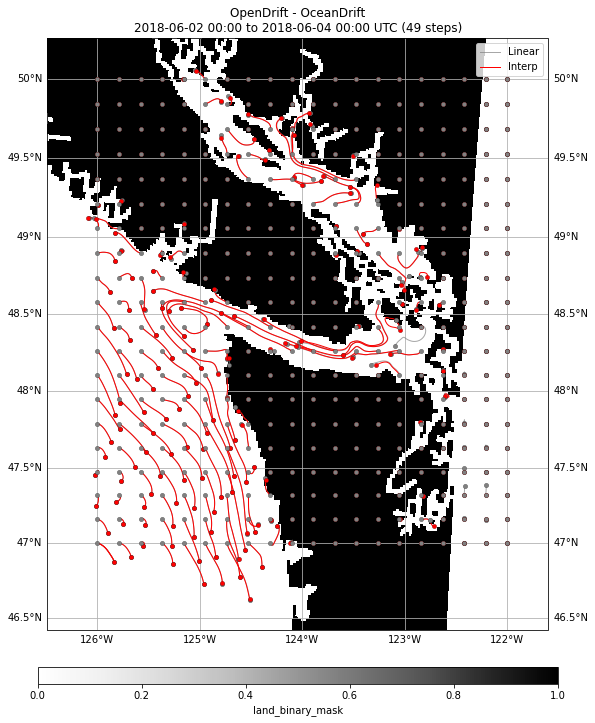

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2018-06-02 00:00 to 2018-06-04 00:00 UTC (49 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [11]:
o3D_linear.plot(compare=o3D_interp,fast=True, background='land_binary_mask', hide_landmask=True,cmap='Greys',
               legend=['Linear','Interp'])

In [12]:
o2D_linear.plot(compare=o2D_interp,fast=True, background='land_binary_mask', hide_landmask=True,cmap='Greys',
                legend=['Linear','Interp'])

15:27:58 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
15:27:59 DEBUG   opendrift.readers.basereader.structured: Calculating lonlat2xy sequentially
15:27:59 DEBUG   opendrift.readers.reader_NEMO_native_linearindex: Time for NEMO native reader: 0:00:00.004005


(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2018-06-01 00:30 to 2018-06-03 23:30 UTC (72 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [13]:
lons,lats = o2D_linear.get_lonlats()
lons_interp,lats_interp = o2D_interp.get_lonlats()

In [14]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(lons.flatten(), lats.flatten(), 'ob')
ax.plot(lons_interp.flatten(), lats_interp.flatten(), '.r')
ax.pcolormesh(reader.lon,reader.lat,reader.land_binary_mask,cmap='Greys')
ax.set_xlim([-126.5,-122])
ax.set_ylim([46,50.5])

(46.0, 50.5)

In [15]:
mask1=lons[:,-1].mask
mask2=lons_interp[:,-1].mask
mask = mask1 | mask2
print(np.sum(mask))
print(np.sum(mask1))
print(np.sum(mask2))

287
257
286


In [16]:
from opendrift.models.physics_methods import distance_between_trajectories

In [17]:
d = distance_between_trajectories(lons[:,-1], lats[:,-1], lons_interp[:,-1], lats_interp[:,-1])
mask1=lons[:,-1].mask
mask2=lons_interp[:,-1].mask
mask = mask1 | mask2
d = np.ma.masked_array(d, mask=mask)

In [18]:
import matplotlib.pyplot as plt
plt.hist(d)

(array([99.,  8.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([    9.16129981,  1840.88233401,  3672.60336821,  5504.32440241,
         7336.0454366 ,  9167.7664708 , 10999.487505  , 12831.2085392 ,
        14662.92957339, 16494.65060759, 18326.37164179]),
 <BarContainer object of 10 artists>)

In [19]:
print(np.mean(d))
print(np.max(d))
print(np.min(d))

918.7740869721124
18326.371641787886
9.161299812672354


Compare postions with masks - maybe by zooming in?

(49.5, 50.5)

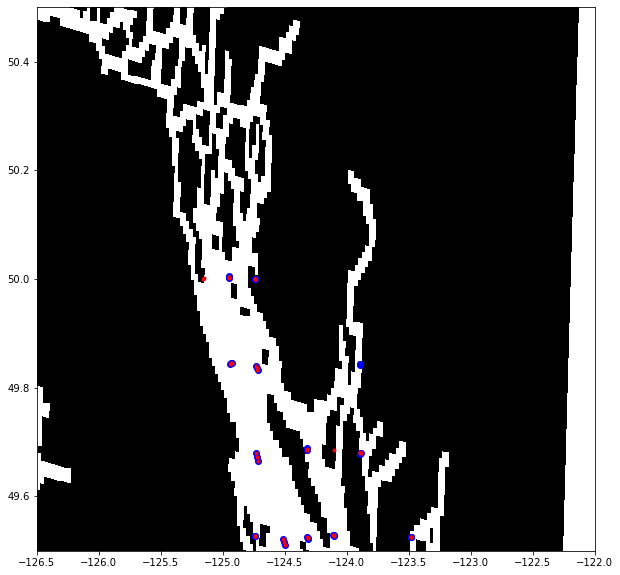

In [20]:
t=np.arange(1,4)
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(lons[:,t].flatten(), lats[:,t].flatten(), 'ob')
ax.plot(lons_interp[:,t].flatten(), lats_interp[:,t].flatten(), '.r')
ax.pcolormesh(reader.lon,reader.lat,reader.land_binary_mask,cmap='Greys')
ax.set_xlim([-126.5,-122])
ax.set_ylim([49.5,50.5])

Now attempt to find elements that are active when they are actually on land

In [21]:
def find_closest_model_point(lon, lat, longrid, latgrid, tol=1e-2):
    j_list, i_list = np.where(
        np.logical_and(
            (np.logical_and(longrid > lon - tol,
                            longrid < lon + tol)),
            (np.logical_and(latgrid > lat - tol,
                            latgrid < lat + tol))
        )
    )
    return j_list, i_list    

Linear reader

In [22]:
lont=reader.lon
latt=reader.lat
land_mask = reader.land_binary_mask

los=lons[:,-1]
las=lats[:,-1]
masks = []
count=0
for lo, la in zip(los, las):
    j,i=find_closest_model_point(lo,la,lont,latt)
    try:
        v = land_mask.values[j[0],i[0]]
        if v == 1:
            masks.append(count)
    except:
        pass
    count+=1

(46.0, 50.5)

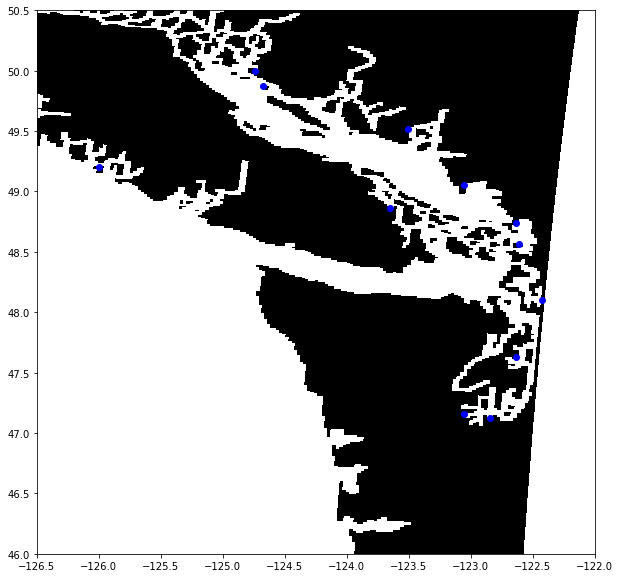

In [23]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(lons[masks,-1], lats[masks,-1], 'ob')
#ax.plot(lons_interp.flatten(), lats_interp.flatten(), '.r')
ax.pcolormesh(reader.lon,reader.lat,reader.land_binary_mask,cmap='Greys')
ax.set_xlim([-126.5,-122])
ax.set_ylim([46,50.5])

In [24]:
masks

[34, 35, 96, 157, 216, 236, 251, 274, 280, 332, 366, 386]

Interp reader

In [25]:
lont=reader.lon
latt=reader.lat
land_mask = reader.land_binary_mask

los=lons_interp[:,-1]
las=lats_interp[:,-1]
masks = []
count=0
for lo, la in zip(los, las):
    j,i=find_closest_model_point(lo,la,lont,latt)
    try:
        v = land_mask.values[j[0],i[0]]
        if v == 1:
            masks.append(count)
    except:
        pass
    count+=1

(46.0, 50.5)

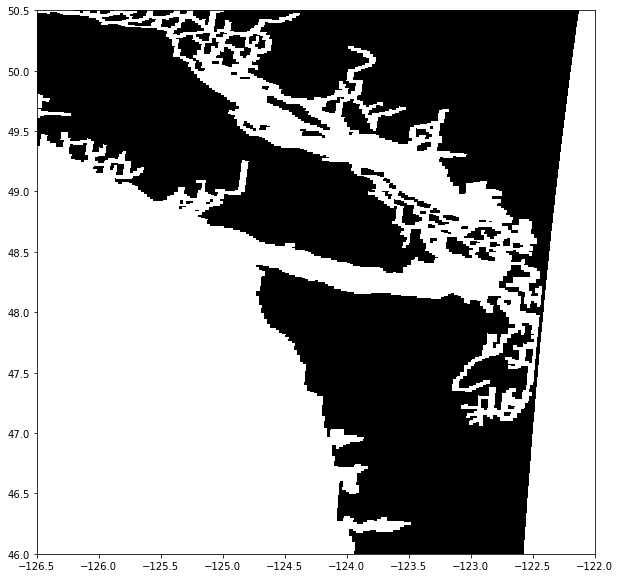

In [26]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(lons_interp[masks,-1], lats_interp[masks,-1], 'ob')
#ax.plot(lons_interp.flatten(), lats_interp.flatten(), '.r')
ax.pcolormesh(reader.lon,reader.lat,reader.land_binary_mask,cmap='Greys')
ax.set_xlim([-126.5,-122])
ax.set_ylim([46,50.5])

In [27]:
masks

[]

So with the linear reader, at the end of the simulation I idenitified a handful of particles that are active but should be on land! Not to mention, earlier plots show active particles outside of the domain! (I didn't idenitfy those here because my algotithm only searchs particles in the domains)

Not so with the interp reader! 

# Conclusions
* In open waters, methods are almost indistinguishable!
* Near coasts, the grounding is quite different. I suspect that the interp method is more accurate because it can more precisely pinpoint the indices of the land mask...

Moving forward I think we should use the interp method for a few reasons.
1. It is closest to what we are currently doing.
2. It treats the grounding better.